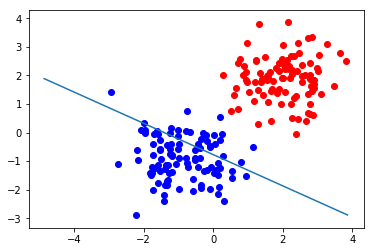

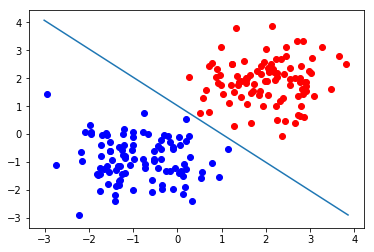

It took  1  iterations for a= [ 0.1  0.1  0.1]


In [26]:
import matplotlib.pyplot as plt
import sys
import random
import numpy as np

#this is loading the data from the files
dat1 = np.genfromtxt('perceptrondat1')
dat2 = np.genfromtxt('perceptrondat2')

def PlotInputData(inputs):
    y_values=[]
    x_values=[]
    for i in range(len(inputs)):
        y_values.append(inputs[i][0])
        x_values.append(inputs[i][1])
    #plotting the inputs
    plt.scatter(y_values[:len(dat1)],x_values[:len(dat1)],color=['red'])
    plt.scatter(y_values[len(dat2):],x_values[len(dat2):],color=['blue'])

#function to plot the line that classifies the two classes
def PlotClassificationLine(weights,inputs):
    max_x=inputs.max(axis=0)[1]
    max_y=(-1*(weights[2]/weights[1]))*max_x  - (weights[0]/weights[1])
    min_x=inputs.min(axis=0)[1]
    min_y=(-1*(weights[2]/weights[1]))*min_x  - (weights[0]/weights[1])
    plt.plot([max_y,max_x],[min_y,min_x])

def UpdateWeights(weights,input,learning_rate):
    y_hat=np.array([1,input[0],input[1]])
    sum=np.dot(weights.T,y_hat)
    
    if sum<0 and i<len(dat1):
        weights+=learning_rate*(-1*y_hat)
        return 1
    if sum>0 and i>=len(dat1):
        weights+=learning_rate*(-1*y_hat)
        return 1
    else:
        return 0
    

#i will assume that all the values are misclassified and then in the loop subtract this variable whenever we find a correctly
#classified data point
def TrainingHyperplane(weights,inputs,learning_rate):
    iterations=0
    count=1
    while 1:
        total_errors=0
        for i in range(len(inputs)):
            total_errors+=UpdateWeights(weights,inputs[i],learning_rate)
        iterations+=1
        #PlotClassificationLine(weights,inputs)
        #PlotInputData(inputs)
        #plt.show()
        count-=1
        if count<=0:
            break
    return iterations

#going to use this array to store both classes data into one
inputs=[]
for i in range(len(dat1)):
    inputs.append(dat1[i])
for i in range(len(dat2)):
    inputs.append(dat2[i])
#done storing the data


'''
going to extract the x and y input from the data and save it to two separated list of x and y values 
which ill use to plot the scatter plot
'''


#converting to numpy array for operations
inputs = np.array(inputs)
weights=np.array([0.1,0.1,0.1])
initial_A=np.copy(weights)

#plotting the initial classification line
PlotClassificationLine(weights,inputs)
PlotInputData(inputs)
plt.show()

steps_to_train=TrainingHyperplane(weights,inputs,0.02)

PlotClassificationLine(weights,inputs)
PlotInputData(inputs)
plt.show()

print 'It took ',steps_to_train,' iterations for a=',initial_A

    


